In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut, train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import VotingClassifier

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [71]:
df = pd.read_csv("cleaned_chatelet.csv")
# df = df[1000:10000]
df

,DATE,NO,NO2,PM10,CO2,TEMP,HUMI,WEEK_OF_YEAR,WEEKEND,CO2_BEFORE,...,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,2014-01-01 01:00:00+00:00,4.0,29.0,101.0,635.0,19.9,46.3,1,0,776.0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-01 02:00:00+00:00,4.0,28.0,89.0,738.0,20.0,46.9,1,0,800.0,...,0,0,0,0,0,0,0,0,0,0
2,2014-01-01 03:00:00+00:00,4.0,28.0,81.0,775.0,20.1,46.5,1,0,799.0,...,0,0,0,0,0,0,0,0,0,0
3,2014-01-01 04:00:00+00:00,4.0,29.0,71.0,664.0,19.8,45.3,1,0,715.0,...,0,0,0,0,0,0,0,0,0,0
4,2014-01-01 05:00:00+00:00,4.0,22.0,66.0,560.0,19.6,44.3,1,0,622.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55971,2022-09-28 21:00:00+00:00,2.0,18.0,36.0,571.0,18.2,43.5,39,0,550.0,...,0,0,0,0,0,0,0,1,0,0
55972,2022-09-28 22:00:00+00:00,4.0,28.0,39.0,526.0,18.1,46.8,39,0,490.0,...,0,0,0,0,0,0,0,0,1,0
55973,2022-09-28 23:00:00+00:00,6.0,32.0,36.0,491.0,18.0,49.3,39,0,474.0,...,0,0,0,0,0,0,0,0,0,1
55974,2022-09-29 00:00:00+00:00,3.0,23.0,11.0,450.0,17.8,50.0,39,0,451.0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df2= pd.read_csv("cleaned_franklin.csv")
df2=df2[['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI']]
df2=df2.add_prefix('auber_')
df=pd.concat([df,df2],axis=1)
df = df[df['NO'].notna()]

In [73]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected stage_train_dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [74]:
missing_values_table(df)

Your selected stage_train_dataframe has 102 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [75]:
df.NO.unique()

array([  4., 104.,   5.,  10.,  39.,  81.,  85.,  55.,  51.,  61.,  26.,
        59.,  50.,  43.,  69.,  83.,  80.,  25.,  14.,  12.,   8.,   7.,
        18.,  41.,  65.,  49.,  32.,  19.,  33.,  29.,  23.,  28.,  17.,
        13.,  16.,  58.,  79.,  88.,  66.,  64.,  63.,  54.,  42.,  45.,
        47.,  37.,  38.,  11.,   6.,   9.,  15.,  35.,  22.,  36.,  52.,
        34.,  21.,  24.,  30.,  91., 114., 142., 137., 157., 122.,  75.,
        73.,  40.,  20.,   3.,  99., 128., 116., 149., 174., 112., 138.,
       141., 167.,  94.,  90.,  77.,  67., 126., 169., 172., 113.,  78.,
        48.,  44., 166., 244., 217., 123., 111., 110.,  84.,  86.,  74.,
        46.,  31., 115., 103.,  72.,  62.,  27.,  60.,  89.,  87.,  93.,
       170., 209.,  98.,  70.,  95., 201., 223., 768., 136., 143.,   2.,
        96., 181., 147., 163., 106., 105., 188., 140., 247., 277., 314.,
       117., 144., 132.,  82.,  97., 135., 179., 146.,  92.,  71., 102.,
        56., 124.,  68., 159., 153., 252., 349., 39

<AxesSubplot:>

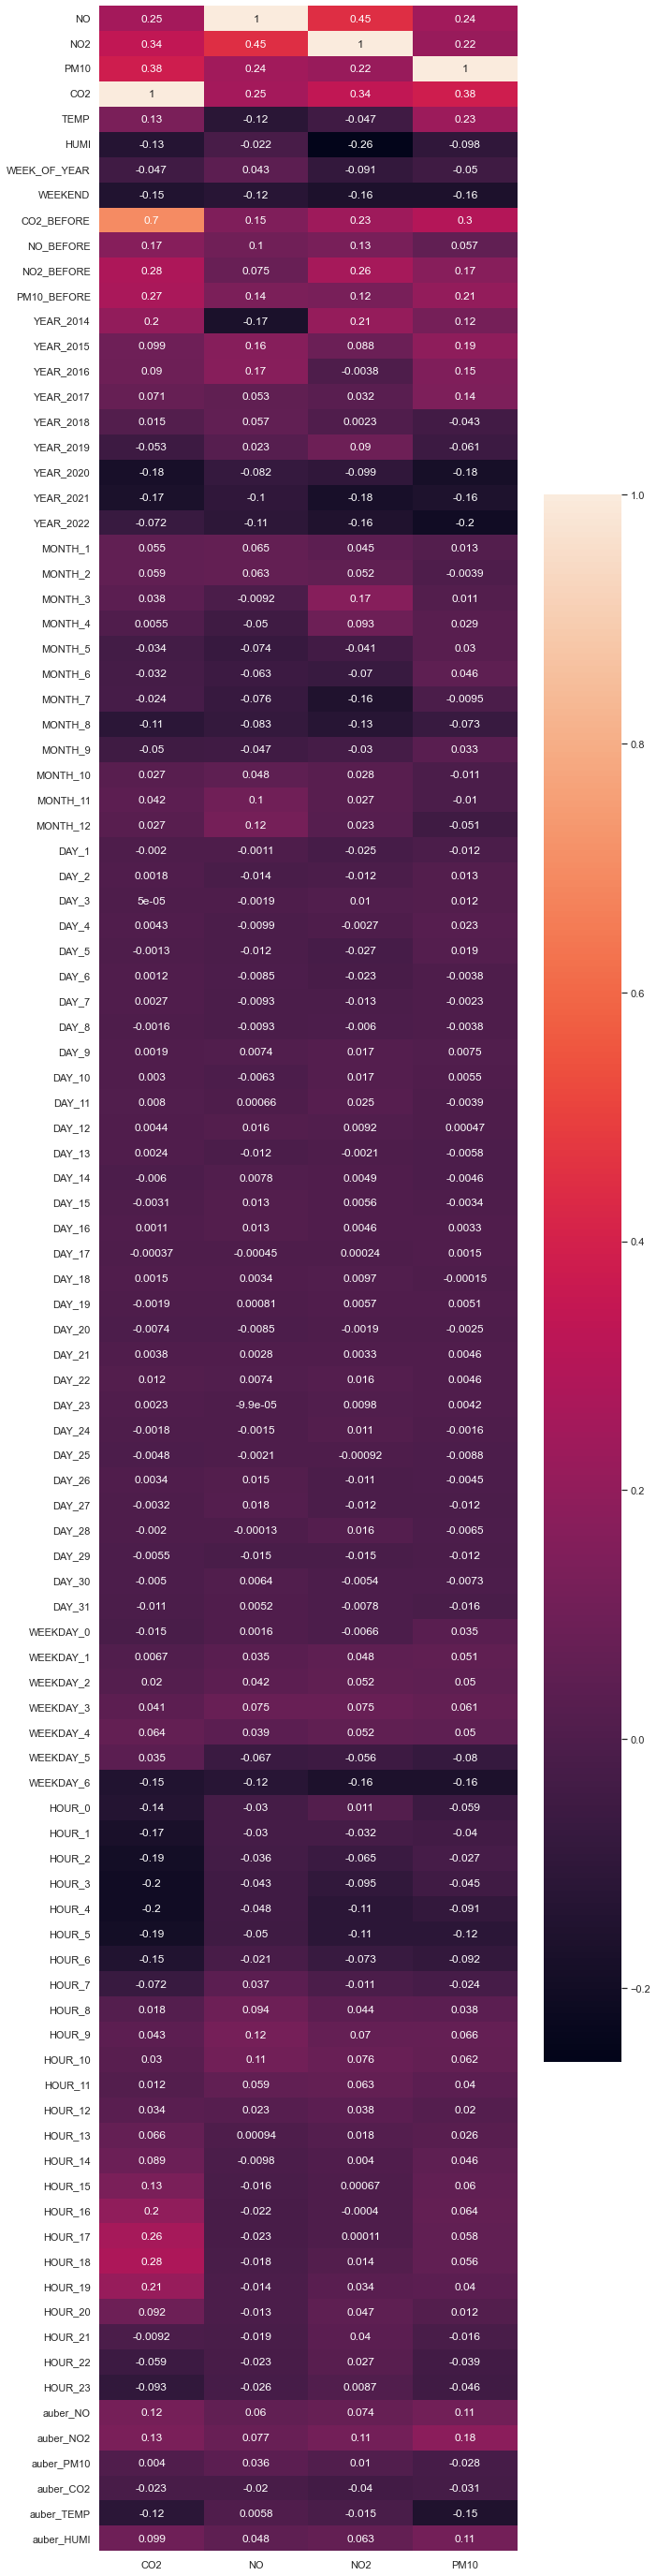

In [76]:
sns.set(rc={'figure.figsize':(10,50)})
sns.heatmap(df.corr()[['CO2', 'NO', 'NO2', 'PM10']], annot=True)

# Question 1

In [77]:
df.columns

Index(['DATE', 'NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI', 'WEEK_OF_YEAR',
       'WEEKEND', 'CO2_BEFORE',
       ...
       'HOUR_20', 'HOUR_21', 'HOUR_22', 'HOUR_23', 'auber_NO', 'auber_NO2',
       'auber_PM10', 'auber_CO2', 'auber_TEMP', 'auber_HUMI'],
      dtype='object', length=102)

In [78]:
from datetime import timedelta
from cProfile import label
df['DATE'] = pd.to_datetime(df['DATE'])
df["DATE"]=df["DATE"].dt.date
test_df = df[df["DATE"]>max(df["DATE"])-timedelta(days=100)]
train_df = df[df["DATE"]<max(df["DATE"])-timedelta(days=100)]
train_df=train_df[train_df["DATE"]>max(df["DATE"])-timedelta(days=365*3)]
# Train with the past 3 years data

For predicting PM10
The MAE for training data is : 22.429751218261092
The MAE for test data is : 32.199209932279906
The MAPE for training data is : 0.2965142142586991
The MAPE for test data is : 0.4860404215672367


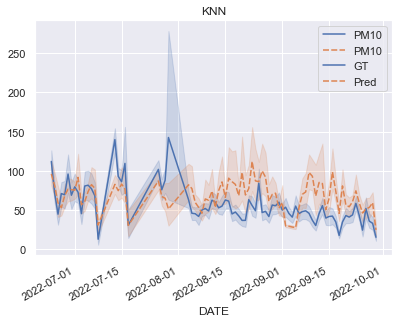

For predicting TEMP
The MAE for training data is : 0.9951567068479098
The MAE for test data is : 2.6310835214446953
The MAPE for training data is : 0.05245525889129813
The MAPE for test data is : 0.13434274059168969


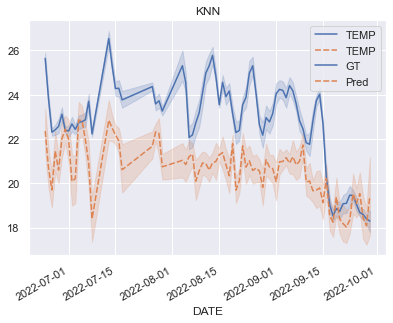

In [93]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

for name, model in models:
    for target in [ 'PM10',  'TEMP']:#'NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI'
        train_y = train_df[target]
        test_y = test_df[target]
        train_x = train_df.drop(columns=["DATE",target])
        test_x = test_df.drop(columns=["DATE",target])
        model.fit(train_x, train_y)
        train_data_predictions = model.predict(train_x)
        test_data_predictions = model.predict(test_x)
        # rsquared_error
        print("For predicting",target)
        print(f"The MAE for training data is : {mean_absolute_error(train_data_predictions, train_y)}")
        print(f"The MAE for test data is : {mean_absolute_error(test_data_predictions, test_y)}")
        print(f"The MAPE for training data is : {mean_absolute_percentage_error(train_data_predictions, train_y)}")
        print(f"The MAPE for test data is : {mean_absolute_percentage_error(test_data_predictions, test_y)}")
        test_compare_df = pd.DataFrame({"GT":np.array(test_y),"Pred":test_data_predictions},index=test_df['DATE'])
        fig, ax = plt.subplots(figsize=[6.4, 4.8])
        sns.lineplot(data=test_compare_df,label=target)
        fig.autofmt_xdate()
        plt.title(name)
        plt.legend()
        plt.show()
    
